In [132]:
import warnings
warnings.filterwarnings('ignore') # 경고 메시지를 무시하고 숨긴다.
from IPython.display import Image
import numpy as np
import pandas as pd
from datetime import datetime
import glob
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [133]:
cosurv = pd.read_csv('./data/corona/Covid19SidoInfState.csv')
cosurv
# 확진자 데이터 출력

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt
0,1,2020년 3월 1일 16시,합계,NaN,NaN,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
1,2,2020년 3월 1일 16시,서울,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
2,3,2020년 3월 1일 16시,부산,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
3,4,2020년 3월 1일 16시,대구,NaN,NaN,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
4,5,2020년 3월 1일 16시,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12750,13742,2021년 12월 06일 00시,전남,全南,Jeollanam-do,27.0,37.0,4185.0,252,4669.0,NaN,NaN,37.0,2021-12-06 09:03:08.448,NaN
12751,13743,2021년 12월 06일 00시,경북,庆北,Gyeongsangbuk-do,112.0,181.0,10678.0,452,11923.0,NaN,1.0,180.0,2021-12-06 09:03:08.448,NaN
12752,13744,2021년 12월 06일 00시,경남,庆南,Gyeongsangnam-do,62.0,121.0,14507.0,470,15707.0,NaN,1.0,120.0,2021-12-06 09:03:08.449,NaN
12753,13745,2021년 12월 06일 00시,제주,济州,Jeju,9.0,39.0,3560.0,572,3859.0,NaN,NaN,39.0,2021-12-06 09:03:08.449,NaN


In [134]:
cosurv.columns

Index(['seq', 'stdDay', 'gubun', 'gubunCn', 'gubunEn', 'deathCnt', 'incDec',
       'isolClearCnt', 'qurRate', 'defCnt', 'isolIngCnt', 'overFlowCnt',
       'localOccCnt', 'createDt', 'updateDt'],
      dtype='object')

In [135]:
cosurv['stdDay'] = pd.to_datetime(cosurv['stdDay'], format=('%Y년 %m월 %d일 %H시'))

def get_month_as_datetime(date):
  return datetime(date.year, date.month, date.day)

cosurv['Time'] = cosurv['stdDay'].apply(get_month_as_datetime)
cosurv.tail()
# 날짜 데이터 사용하기 쉽게  변경

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt,Time
12750,13742,2021-12-06,전남,全南,Jeollanam-do,27.0,37.0,4185.0,252,4669.0,NaN,NaN,37.0,2021-12-06 09:03:08.448,NaN,2021-12-06
12751,13743,2021-12-06,경북,庆北,Gyeongsangbuk-do,112.0,181.0,10678.0,452,11923.0,NaN,1.0,180.0,2021-12-06 09:03:08.448,NaN,2021-12-06
12752,13744,2021-12-06,경남,庆南,Gyeongsangnam-do,62.0,121.0,14507.0,470,15707.0,NaN,1.0,120.0,2021-12-06 09:03:08.449,NaN,2021-12-06
12753,13745,2021-12-06,제주,济州,Jeju,9.0,39.0,3560.0,572,3859.0,NaN,NaN,39.0,2021-12-06 09:03:08.449,NaN,2021-12-06
12754,13746,2021-12-06,검역,隔離區,Lazaretto,16.0,6.0,6300.0,-,6501.0,NaN,6.0,NaN,2021-12-06 09:03:08.45,NaN,2021-12-06


In [136]:
cosurv['Time'] = cosurv['Time'].astype(str)
cosurv['TL'] = cosurv.Time + '_' + cosurv.gubun
cosurv
# 장소와 시간을 합친 column 추가

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt,Time,TL
0,1,2020-03-01 16:00:00,합계,NaN,NaN,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN,2020-03-01,2020-03-01_합계
1,2,2020-03-01 16:00:00,서울,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN,2020-03-01,2020-03-01_서울
2,3,2020-03-01 16:00:00,부산,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN,2020-03-01,2020-03-01_부산
3,4,2020-03-01 16:00:00,대구,NaN,NaN,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN,2020-03-01,2020-03-01_대구
4,5,2020-03-01 16:00:00,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN,2020-03-01,2020-03-01_인천
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12750,13742,2021-12-06 00:00:00,전남,全南,Jeollanam-do,27.0,37.0,4185.0,252,4669.0,NaN,NaN,37.0,2021-12-06 09:03:08.448,NaN,2021-12-06,2021-12-06_전남
12751,13743,2021-12-06 00:00:00,경북,庆北,Gyeongsangbuk-do,112.0,181.0,10678.0,452,11923.0,NaN,1.0,180.0,2021-12-06 09:03:08.448,NaN,2021-12-06,2021-12-06_경북
12752,13744,2021-12-06 00:00:00,경남,庆南,Gyeongsangnam-do,62.0,121.0,14507.0,470,15707.0,NaN,1.0,120.0,2021-12-06 09:03:08.449,NaN,2021-12-06,2021-12-06_경남
12753,13745,2021-12-06 00:00:00,제주,济州,Jeju,9.0,39.0,3560.0,572,3859.0,NaN,NaN,39.0,2021-12-06 09:03:08.449,NaN,2021-12-06,2021-12-06_제주


In [137]:
consurv1 = cosurv[cosurv['gubun'] == '서울']
consurv2 = cosurv[cosurv['gubun'] == '대구']
consurv3 = cosurv[cosurv['gubun'] == '부산']
consurv4 = cosurv[cosurv['gubun'] == '광주']
consurv15 = cosurv[cosurv['gubun'] == '대전']
# 지역별 데이터프레임 구분

In [138]:
consurv1['daily_coro'] = consurv1['defCnt'].diff()
consurv2['daily_coro'] = consurv2['defCnt'].diff()
consurv3['daily_coro'] = consurv3['defCnt'].diff()
consurv4['daily_coro'] = consurv4['defCnt'].diff()
consurv15['daily_coro'] = consurv15['defCnt'].diff()
# 확진자를 나타내는 column을 만듬

In [139]:
consurv5 = pd.concat([consurv1, consurv2])
consurv6 = pd.concat([consurv5, consurv3])
consurv7 = pd.concat([consurv6, consurv4])
cosurv = pd.concat([consurv7, consurv15])
df_sorted_by_values = cosurv.sort_values(by='TL' ,ascending=False)
cosurv
# 지역별로 나눈 데이터프레임을 하나로 정리 

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt,Time,TL,daily_coro
1,2,2020-03-01 16:00:00,서울,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN,2020-03-01,2020-03-01_서울,NaN
20,21,2020-03-04 00:00:00,서울,NaN,NaN,NaN,1.0,NaN,1,99.0,NaN,NaN,NaN,2020-03-04 19:44:27.27,NaN,2020-03-04,2020-03-04_서울,NaN
38,39,2020-03-05 00:00:00,서울,NaN,NaN,NaN,4.0,NaN,1.1,103.0,NaN,NaN,NaN,2020-03-05 15:29:39.39,2020-03-05 21:05:30.30,2020-03-05,2020-03-05_서울,4.0
56,57,2020-03-06 00:00:00,서울,NaN,NaN,NaN,2.0,NaN,1.1,105.0,NaN,NaN,NaN,2020-03-06 15:09:04.04,NaN,2020-03-06,2020-03-06_서울,2.0
74,75,2020-03-07 00:00:00,서울,NaN,NaN,NaN,3.0,NaN,1.1,108.0,NaN,NaN,NaN,2020-03-07 15:29:59.59,NaN,2020-03-07,2020-03-07_서울,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,13639,2021-12-02 00:00:00,대전,大田,Daejeon,70.0,166.0,8033.0,602,8809.0,706.0,NaN,166.0,2021-12-02 09:02:44.57,NaN,2021-12-02,2021-12-02_대전,166.0
12685,13677,2021-12-03 00:00:00,대전,大田,Daejeon,71.0,97.0,8083.0,608,8906.0,NaN,NaN,97.0,2021-12-03 09:10:27.044,NaN,2021-12-03,2021-12-03_대전,97.0
12704,13696,2021-12-04 00:00:00,대전,大田,Daejeon,71.0,126.0,8136.0,617,9032.0,NaN,NaN,126.0,2021-12-04 09:17:37.916,NaN,2021-12-04,2021-12-04_대전,126.0
12723,13715,2021-12-05 00:00:00,대전,大田,Daejeon,73.0,142.0,8163.0,627,9174.0,NaN,1.0,141.0,2021-12-05 08:47:30.291,NaN,2021-12-05,2021-12-05_대전,142.0


In [140]:
cosurv = cosurv[pd.notnull(cosurv['daily_coro'])] # NaN값 제거
cosurv

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt,Time,TL,daily_coro
38,39,2020-03-05,서울,NaN,NaN,NaN,4.0,NaN,1.1,103.0,NaN,NaN,NaN,2020-03-05 15:29:39.39,2020-03-05 21:05:30.30,2020-03-05,2020-03-05_서울,4.0
56,57,2020-03-06,서울,NaN,NaN,NaN,2.0,NaN,1.1,105.0,NaN,NaN,NaN,2020-03-06 15:09:04.04,NaN,2020-03-06,2020-03-06_서울,2.0
74,75,2020-03-07,서울,NaN,NaN,NaN,3.0,NaN,1.1,108.0,NaN,NaN,NaN,2020-03-07 15:29:59.59,NaN,2020-03-07,2020-03-07_서울,3.0
92,93,2020-03-08,서울,NaN,NaN,NaN,12.0,NaN,1.2,120.0,NaN,NaN,NaN,2020-03-08 14:56:02.02,NaN,2020-03-08,2020-03-08_서울,12.0
110,111,2020-03-09,서울,NaN,NaN,NaN,10.0,29.0,1.3,130.0,NaN,NaN,NaN,2020-03-09 12:54:29.29,NaN,2020-03-09,2020-03-09_서울,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,13639,2021-12-02,대전,大田,Daejeon,70.0,166.0,8033.0,602,8809.0,706.0,NaN,166.0,2021-12-02 09:02:44.57,NaN,2021-12-02,2021-12-02_대전,166.0
12685,13677,2021-12-03,대전,大田,Daejeon,71.0,97.0,8083.0,608,8906.0,NaN,NaN,97.0,2021-12-03 09:10:27.044,NaN,2021-12-03,2021-12-03_대전,97.0
12704,13696,2021-12-04,대전,大田,Daejeon,71.0,126.0,8136.0,617,9032.0,NaN,NaN,126.0,2021-12-04 09:17:37.916,NaN,2021-12-04,2021-12-04_대전,126.0
12723,13715,2021-12-05,대전,大田,Daejeon,73.0,142.0,8163.0,627,9174.0,NaN,1.0,141.0,2021-12-05 08:47:30.291,NaN,2021-12-05,2021-12-05_대전,142.0


In [141]:
cosurv_columns = ['gubun', 'daily_coro', 'Time', 'TL']
cosurv = cosurv[cosurv_columns]
cosurv = cosurv[cosurv['gubun'] != '합계']
cosurv
# 필요한 columns만 남기는 코드

,gubun,daily_coro,Time,TL
38,서울,4.0,2020-03-05,2020-03-05_서울
56,서울,2.0,2020-03-06,2020-03-06_서울
74,서울,3.0,2020-03-07,2020-03-07_서울
92,서울,12.0,2020-03-08,2020-03-08_서울
110,서울,10.0,2020-03-09,2020-03-09_서울
...,...,...,...,...
12666,대전,166.0,2021-12-02,2021-12-02_대전
12685,대전,97.0,2021-12-03,2021-12-03_대전
12704,대전,126.0,2021-12-04,2021-12-04_대전
12723,대전,142.0,2021-12-05,2021-12-05_대전


In [142]:
cosurv.rename(columns = {"gubun": "Location", "daily_coro": "일일확진자", 'Time' : 'Time', 'TL' : 'TL'}, inplace=True)
cosurv
# column명 변경

,Location,일일확진자,Time,TL
38,서울,4.0,2020-03-05,2020-03-05_서울
56,서울,2.0,2020-03-06,2020-03-06_서울
74,서울,3.0,2020-03-07,2020-03-07_서울
92,서울,12.0,2020-03-08,2020-03-08_서울
110,서울,10.0,2020-03-09,2020-03-09_서울
...,...,...,...,...
12666,대전,166.0,2021-12-02,2021-12-02_대전
12685,대전,97.0,2021-12-03,2021-12-03_대전
12704,대전,126.0,2021-12-04,2021-12-04_대전
12723,대전,142.0,2021-12-05,2021-12-05_대전


In [143]:
cosurv = cosurv.sort_index(ascending=True)
cosurv['일일확진자'][(cosurv['일일확진자'] < 0)] = 0  
cosurv
# 초기 코로나 확진자 숫자를 계산할때 나온 마이너스값 제거

,Location,일일확진자,Time,TL
38,서울,4.0,2020-03-05,2020-03-05_서울
39,부산,0.0,2020-03-05,2020-03-05_부산
40,대구,321.0,2020-03-05,2020-03-05_대구
42,광주,1.0,2020-03-05,2020-03-05_광주
43,대전,1.0,2020-03-05,2020-03-05_대전
...,...,...,...,...
12737,서울,1408.0,2021-12-06,2021-12-06_서울
12738,부산,193.0,2021-12-06,2021-12-06_부산
12739,대구,146.0,2021-12-06,2021-12-06_대구
12741,광주,43.0,2021-12-06,2021-12-06_광주


In [144]:
coseoul = cosurv[cosurv['Location'] == '서울']
coseoul = coseoul.replace(0, np.NaN)
coseoul = coseoul.replace(12868.0, 420)
coseoul = coseoul.replace(26876.0, 102)
coseoul = coseoul.fillna(method = 'pad')
coseoul
# 잘못된 확진자 값 수정

,Location,일일확진자,Time,TL
38,서울,4.0,2020-03-05,2020-03-05_서울
56,서울,2.0,2020-03-06,2020-03-06_서울
74,서울,3.0,2020-03-07,2020-03-07_서울
92,서울,12.0,2020-03-08,2020-03-08_서울
110,서울,10.0,2020-03-09,2020-03-09_서울
...,...,...,...,...
12661,서울,2267.0,2021-12-02,2021-12-02_서울
12680,서울,2099.0,2021-12-03,2021-12-03_서울
12699,서울,2273.0,2021-12-04,2021-12-04_서울
12718,서울,2032.0,2021-12-05,2021-12-05_서울


In [145]:
cog = cosurv[cosurv['Location'] == '광주']
cog = cog.replace(0, np.NaN)
cog = cog.fillna(method = 'pad')
cog = cog.replace(812.0, 10)
cog.drop(cog[cog['일일확진자'] >1000].index, inplace=True)
cog
# 잘못된 확진자값 수정

,Location,일일확진자,Time,TL
42,광주,1.0,2020-03-05,2020-03-05_광주
60,광주,1.0,2020-03-06,2020-03-06_광주
78,광주,1.0,2020-03-07,2020-03-07_광주
96,광주,1.0,2020-03-08,2020-03-08_광주
114,광주,2.0,2020-03-09,2020-03-09_광주
...,...,...,...,...
12665,광주,39.0,2021-12-02,2021-12-02_광주
12684,광주,45.0,2021-12-03,2021-12-03_광주
12703,광주,39.0,2021-12-04,2021-12-04_광주
12722,광주,40.0,2021-12-05,2021-12-05_광주


In [146]:
cod = cosurv[cosurv['Location'] == '대구']
cod = cod.replace(0, np.NaN)
cod = cod.fillna(method = 'pad')
cod = cod.replace(625.0, 20)
cod.drop(cod[cod['일일확진자'] >1000].index, inplace=True)
cod

,Location,일일확진자,Time,TL
40,대구,321.0,2020-03-05,2020-03-05_대구
58,대구,367.0,2020-03-06,2020-03-06_대구
76,대구,390.0,2020-03-07,2020-03-07_대구
94,대구,297.0,2020-03-08,2020-03-08_대구
112,대구,190.0,2020-03-09,2020-03-09_대구
...,...,...,...,...
12663,대구,70.0,2021-12-02,2021-12-02_대구
12682,대구,99.0,2021-12-03,2021-12-03_대구
12701,대구,90.0,2021-12-04,2021-12-04_대구
12720,대구,117.0,2021-12-05,2021-12-05_대구


In [147]:
cob = cosurv[cosurv['Location'] == '부산']
cob = cob.replace(0, np.NaN)
cob = cob.fillna(method = 'pad')
cob = cob.fillna(0)
cob.drop(cob[cob['일일확진자'] >1000].index, inplace=True)
cob

,Location,일일확진자,Time,TL
39,부산,0.0,2020-03-05,2020-03-05_부산
57,부산,3.0,2020-03-06,2020-03-06_부산
75,부산,1.0,2020-03-07,2020-03-07_부산
93,부산,1.0,2020-03-08,2020-03-08_부산
111,부산,1.0,2020-03-09,2020-03-09_부산
...,...,...,...,...
12662,부산,158.0,2021-12-02,2021-12-02_부산
12681,부산,141.0,2021-12-03,2021-12-03_부산
12700,부산,201.0,2021-12-04,2021-12-04_부산
12719,부산,207.0,2021-12-05,2021-12-05_부산


In [148]:
coj = cosurv[cosurv['Location'] == '대전']
coj = coj.replace(0, np.NaN)
coj = coj.fillna(method = 'pad')
coj = coj.replace(644.0, 11)
coj.drop(coj[coj['일일확진자'] >1000].index, inplace=True)
coj

,Location,일일확진자,Time,TL
43,대전,1.0,2020-03-05,2020-03-05_대전
61,대전,2.0,2020-03-06,2020-03-06_대전
79,대전,2.0,2020-03-07,2020-03-07_대전
97,대전,2.0,2020-03-08,2020-03-08_대전
115,대전,1.0,2020-03-09,2020-03-09_대전
...,...,...,...,...
12666,대전,166.0,2021-12-02,2021-12-02_대전
12685,대전,97.0,2021-12-03,2021-12-03_대전
12704,대전,126.0,2021-12-04,2021-12-04_대전
12723,대전,142.0,2021-12-05,2021-12-05_대전


In [149]:
consurv5 = pd.concat([coseoul, cod])
consurv6 = pd.concat([consurv5, coj])
consurv7 = pd.concat([consurv6, cob])
cosurv = pd.concat([consurv7, cog])
df_sorted_by_values = cosurv.sort_values(by='TL' ,ascending=False)
cosurv
# 확진자 숫자를 수정한 지역별 데이터프레임을 하나로 합침

,Location,일일확진자,Time,TL
38,서울,4.0,2020-03-05,2020-03-05_서울
56,서울,2.0,2020-03-06,2020-03-06_서울
74,서울,3.0,2020-03-07,2020-03-07_서울
92,서울,12.0,2020-03-08,2020-03-08_서울
110,서울,10.0,2020-03-09,2020-03-09_서울
...,...,...,...,...
12665,광주,39.0,2021-12-02,2021-12-02_광주
12684,광주,45.0,2021-12-03,2021-12-03_광주
12703,광주,39.0,2021-12-04,2021-12-04_광주
12722,광주,40.0,2021-12-05,2021-12-05_광주


In [150]:
cosurv = cosurv.sort_index(ascending=True)
cosurv['일일확진자'] = cosurv['일일확진자'].fillna(0)
cosurv
# 다시 NaN값 수정

,Location,일일확진자,Time,TL
38,서울,4.0,2020-03-05,2020-03-05_서울
39,부산,0.0,2020-03-05,2020-03-05_부산
40,대구,321.0,2020-03-05,2020-03-05_대구
42,광주,1.0,2020-03-05,2020-03-05_광주
43,대전,1.0,2020-03-05,2020-03-05_대전
...,...,...,...,...
12737,서울,1408.0,2021-12-06,2021-12-06_서울
12738,부산,193.0,2021-12-06,2021-12-06_부산
12739,대구,146.0,2021-12-06,2021-12-06_대구
12741,광주,43.0,2021-12-06,2021-12-06_광주


In [151]:
input_file = r'C:\KDK\python\data\corona\Tall' 
output_file = r'C:\KDK\python\data\corona\Tall\tall.csv' 

allFile_list = glob.glob(os.path.join(input_file, 'Tall_*')) 
print(allFile_list)
allData = [] 
for file in allFile_list:
    df = pd.read_csv(file) 
    allData.append(df)

dataCombine = pd.concat(allData, axis=0, ignore_index=True) 
dataCombine.to_csv(output_file, index=False)

# 톨게이트 이용자 숫자 데이터셋 통합

['C:\\KDK\\python\\data\\corona\\Tall\\Tall_2020_1.csv', 'C:\\KDK\\python\\data\\corona\\Tall\\Tall_2020_2.csv', 'C:\\KDK\\python\\data\\corona\\Tall\\Tall_2020_3.csv', 'C:\\KDK\\python\\data\\corona\\Tall\\Tall_2020_4.csv', 'C:\\KDK\\python\\data\\corona\\Tall\\Tall_2021_1.csv', 'C:\\KDK\\python\\data\\corona\\Tall\\Tall_2021_2.csv', 'C:\\KDK\\python\\data\\corona\\Tall\\Tall_2021_3.csv']


In [152]:
tall = pd.read_csv('./data/corona/tall/Tall.csv') # 톨게이트 데이터셋 출력
tall

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,20200101,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,147,2,3,13,8,9,182
1,20200101,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,311,2,9,16,74,8,420
2,20200101,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,1769,20,40,49,120,260,2258
3,20200101,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,8312,26,72,40,499,444,9393
4,20200101,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,2383,33,40,46,141,322,2965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899385,20210930,532,회인,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,947,20,13,13,72,32,1097
899386,20210930,216,횡성,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,487,26,50,45,7,5,620
899387,20210930,216,횡성,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,2941,139,84,110,161,156,3591
899388,20210930,216,횡성,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,466,31,82,39,7,51,676


In [153]:
tall_columns = ['집계일자', '영업소명', '총교통량']
tall = tall[tall_columns]
tall1 = tall.groupby(by=['집계일자','영업소명']).sum()
tall1.to_csv('./data/corona/tall/tallgate.csv')
tall2 = pd.read_csv('./data/corona/tall/tallgate.csv')
tall2
# 필요한 컬럼만 남겨서 다시 데이터셋 출력

,집계일자,영업소명,총교통량
0,20200101,가락,602
1,20200101,가락(개),25144
2,20200101,가락2,966
3,20200101,가산,19487
4,20200101,가조,3452
...,...,...,...
234650,20210930,활천,4253
234651,20210930,황간,3764
234652,20210930,황전,3550
234653,20210930,회인,2582


In [154]:
seoul = ['북고양','양주','불암산','화도','일산대교','김포','구리남양주','남산1호터널','인천','동서울','시흥','금천','우면산터널','성남','고잔','남안산','서서울','의왕','서울','초월']
daegu = ['칠곡','북대구','팔공산','서대구','남대구','앞산','동대구','수성','경산','청통와촌']
busan = ['광재','김해부산','남양산','부산','장안','기장일광','해운대','광안대로','대동','북부산','백양터널','서부산','명지','영도']
gyangju = ['장성','담양','광주','북광주','창평','동광주','유덕IC','동광산','서광산','송암','소태']
daejun = ['대전', '유성', '서대전', '남세종', '신탄진', '옥천', '추부']
# 지역별 톨게이트 이름 정리

def convert(data):
    if data in seoul:
        return '서울'
    elif data in daegu:
        return '대구'
    elif data in busan:
        return '부산'
    elif data in gyangju:
        return '광주'
    elif data in daejun:
        return '대전'
    else :
        return '그외'

tall2['영업소명'] = tall2['영업소명'].apply(convert)
tall2 = tall2[tall2['영업소명'] != '그외'] # 표기되지 않은 기타 톨게이트 데이터에서 제거
tall2

,집계일자,영업소명,총교통량
11,20200101,대구,21435
24,20200101,부산,10244
25,20200101,광주,37511
29,20200101,서울,156514
53,20200101,서울,151930
...,...,...,...
234604,20210930,광주,5441
234611,20210930,대구,13189
234612,20210930,대전,8669
234618,20210930,대구,29855


In [155]:
tall3 = tall2.groupby(by=['집계일자','영업소명']).sum()
tall3.to_csv('./data/corona/tall/tallgate.csv')
tall4 = pd.read_csv('./data/corona/tall/tallgate.csv')
tall4
# 톨게이트 이용자 데이터 재정렬해서 출력

,집계일자,영업소명,총교통량
0,20200101,광주,163710
1,20200101,대구,239039
2,20200101,대전,160113
3,20200101,부산,302030
4,20200101,서울,1090782
...,...,...,...
3185,20210930,광주,191529
3186,20210930,대구,330743
3187,20210930,대전,222045
3188,20210930,부산,368175


In [156]:
tall4['Time'] = pd.to_datetime(tall4['집계일자'], format=('%Y%m%d')) # 톨게이트 날짜 데이터 정리
tall4_columns = ['Time', '영업소명', '총교통량'] # 톨게이트 데이터프레임에서 필요한 컬럼
tall4 = tall4[tall4_columns]

In [157]:
tall4.rename(columns = {"Time": "Time", "영업소명": "Location", '총교통량' : '총교통량'}, inplace=True) # column명 변경
tall4

,Time,Location,총교통량
0,2020-01-01,광주,163710
1,2020-01-01,대구,239039
2,2020-01-01,대전,160113
3,2020-01-01,부산,302030
4,2020-01-01,서울,1090782
...,...,...,...
3185,2021-09-30,광주,191529
3186,2021-09-30,대구,330743
3187,2021-09-30,대전,222045
3188,2021-09-30,부산,368175


In [158]:
input_file = r'C:\KDK\python\data\corona\Tall\ttt' 
output_file = r'C:\KDK\python\data\corona\Tall\ttt\t_tall.csv' 

allFile_list = glob.glob(os.path.join(input_file, 'tall_*')) 
print(allFile_list)
allData = [] 
for file in allFile_list:
    df = pd.read_csv(file) 
    allData.append(df)

dataCombine = pd.concat(allData, axis=0, ignore_index=True) 
dataCombine.to_csv(output_file, index=False)

# 2021년 10월 이후 톨게이트 데이터 통합

['C:\\KDK\\python\\data\\corona\\Tall\\ttt\\tall_2021_10.csv', 'C:\\KDK\\python\\data\\corona\\Tall\\ttt\\tall_2021_11.csv']


In [159]:
t_tall = pd.read_csv('./data/corona/Tall/ttt/tall.csv')
t_tall
# 통합한 톨게이트 데이터 출력

,집계일자,영업소코드,입출구구분코드,TCS하이패스구분코드,고속도로운영기관구분코드,영업형태구분코드,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,Unnamed: 13
0,20211001,11,0,1,0,1,8133,407,512,650,683,1213,11598,NaN
1,20211001,11,0,2,0,1,67014,1900,644,767,2218,4352,76895,NaN
2,20211001,11,1,1,0,1,9050,279,658,626,374,1312,12299,NaN
3,20211001,11,1,2,0,1,70167,1957,741,921,2635,4666,81087,NaN
4,20211001,12,0,1,0,1,282,8,14,10,4,18,336,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97561,20211128,986,1,2,0,0,3361,20,65,29,65,71,3611,NaN
97562,20211128,987,0,1,0,0,1772,32,73,39,20,15,1951,NaN
97563,20211128,987,0,2,0,0,10230,61,181,84,331,232,11119,NaN
97564,20211128,987,1,1,0,0,2044,19,22,76,31,141,2333,NaN


In [160]:
tall_columns = ['집계일자', '영업소코드', '총교통량']
t_tall = t_tall[tall_columns]
t_tall1 = t_tall.groupby(by=['집계일자','영업소코드']).sum()
t_tall1.to_csv('./data/corona/tall/ttt/t_tallgate.csv')
t_tall2 = pd.read_csv('./data/corona/tall/ttt/t_tallgate.csv')
t_tall2.head(20)
# 필요한 컬럼을 정리하고 정리한 데이터프레임을 다시 출력하는 코드

,집계일자,영업소코드,총교통량
0,20211001,11,181879
1,20211001,12,2956
2,20211001,13,7638
3,20211001,25,15379
4,20211001,29,44405
5,20211001,53,89926
6,20211001,56,1599
7,20211001,61,203825
8,20211001,62,213577
9,20211001,63,33186


In [161]:
seoul = [11, 61, 62, 67, 68, 101, 190, 253]
daegu = [127,129,131,201,230,519,524]
busan = [140, 150, 244,250,252, 755]
gyangju = [166,167,249,261,262,552,553,569]
daejun = [115, 152, 153, 579, 113, 116, 204]
# 지역별 톨게이트명. 이름이 아니라 숫자로 정리되어있다.

def t_convert(data):
    if data in seoul:
        return '서울'
    elif data in daegu:
        return '대구'
    elif data in busan:
        return '부산'
    elif data in gyangju:
        return '광주'
    elif data in daejun:
        return '대전'
    else :
        return '그외'

t_tall2['영업소코드'] = t_tall2['영업소코드'].apply(t_convert)
t_tall2 = t_tall2[t_tall2['영업소코드'] != '그외']
t_tall2
# 필요한 톨게이트만 정리해서 그 톨게이트의 이용자 데이터만 출력

,집계일자,영업소코드,총교통량
0,20211001,서울,181879
7,20211001,서울,203825
8,20211001,서울,213577
13,20211001,서울,166327
14,20211001,서울,198978
...,...,...,...
25526,20211130,광주,13728
25527,20211130,광주,41680
25543,20211130,광주,17312
25553,20211130,대전,18118


In [162]:
t_tall3 = t_tall2.groupby(by=['집계일자','영업소코드']).sum()
t_tall3.to_csv('./data/corona/tall/ttt/t_tallgate.csv')
t_tall4 = pd.read_csv('./data/corona/tall/ttt/t_tallgate.csv')
t_tall4
# 데이터프레임의 row 정렬

,집계일자,영업소코드,총교통량
0,20211001,광주,214442
1,20211001,대구,354352
2,20211001,대전,238696
3,20211001,부산,404042
4,20211001,서울,1557002
...,...,...,...
300,20211130,광주,167934
301,20211130,대구,299925
302,20211130,대전,197423
303,20211130,부산,340303


In [163]:
t_tall4['Time'] = pd.to_datetime(t_tall4['집계일자'], format=('%Y%m%d')) # 날짜 데이터 깔끔하게 정리
t_tall4_columns = ['Time', '영업소코드', '총교통량'] # 필요한 column명
t_tall4 = t_tall4[t_tall4_columns]

In [164]:
t_tall4.rename(columns = {"Time": "Time", "영업소코드": "Location", '총교통량' : '총교통량'}, inplace=True) # column명 변경
t_tall4

,Time,Location,총교통량
0,2021-10-01,광주,214442
1,2021-10-01,대구,354352
2,2021-10-01,대전,238696
3,2021-10-01,부산,404042
4,2021-10-01,서울,1557002
...,...,...,...
300,2021-11-30,광주,167934
301,2021-11-30,대구,299925
302,2021-11-30,대전,197423
303,2021-11-30,부산,340303


In [165]:
tall4 = pd.concat([tall4, t_tall4]) # 2020~2021.11 데이터 통합
tall4

,Time,Location,총교통량
0,2020-01-01,광주,163710
1,2020-01-01,대구,239039
2,2020-01-01,대전,160113
3,2020-01-01,부산,302030
4,2020-01-01,서울,1090782
...,...,...,...
300,2021-11-30,광주,167934
301,2021-11-30,대구,299925
302,2021-11-30,대전,197423
303,2021-11-30,부산,340303


In [166]:
tall4['Time'] = tall4['Time'].astype(str)
tall4['TL'] = tall4.Time + '_' + tall4.Location
tall4
# 확진자 숫자 데이터에도 만들었던 날짜 + 시간 column 만들기

,Time,Location,총교통량,TL
0,2020-01-01,광주,163710,2020-01-01_광주
1,2020-01-01,대구,239039,2020-01-01_대구
2,2020-01-01,대전,160113,2020-01-01_대전
3,2020-01-01,부산,302030,2020-01-01_부산
4,2020-01-01,서울,1090782,2020-01-01_서울
...,...,...,...,...
300,2021-11-30,광주,167934,2021-11-30_광주
301,2021-11-30,대구,299925,2021-11-30_대구
302,2021-11-30,대전,197423,2021-11-30_대전
303,2021-11-30,부산,340303,2021-11-30_부산


In [167]:
df_sorted_by_values = tall4.sort_values(by='TL' ,ascending=False) # column TL 순서로 정렬
tall4

,Time,Location,총교통량,TL
0,2020-01-01,광주,163710,2020-01-01_광주
1,2020-01-01,대구,239039,2020-01-01_대구
2,2020-01-01,대전,160113,2020-01-01_대전
3,2020-01-01,부산,302030,2020-01-01_부산
4,2020-01-01,서울,1090782,2020-01-01_서울
...,...,...,...,...
300,2021-11-30,광주,167934,2021-11-30_광주
301,2021-11-30,대구,299925,2021-11-30_대구
302,2021-11-30,대전,197423,2021-11-30_대전
303,2021-11-30,부산,340303,2021-11-30_부산


In [168]:
vaccine = pd.read_csv('./data/corona/Covid19Vaccine01.csv') # 백신 데이터셋 출력
vaccine = vaccine.fillna(0) # 백신 접종자가 없어서 NaN인 값들을 0으로 변경
vaccine

,seq,baseDate,sido,firstCnt,secondCnt,totalFirstCnt,totalSecondCnt,accumulatedFirstCnt,accumulatedSecondCnt
0,20210311_강원도,2021-03-11 00:00:00,강원도,2627.0,0.0,14790,0.0,12163,0.0
1,20210311_경기도,2021-03-11 00:00:00,경기도,9961.0,0.0,105876,0.0,95915,0.0
2,20210311_경상남도,2021-03-11 00:00:00,경상남도,2036.0,0.0,43848,0.0,41812,0.0
3,20210311_경상북도,2021-03-11 00:00:00,경상북도,2365.0,0.0,28435,0.0,26070,0.0
4,20210311_광주광역시,2021-03-11 00:00:00,광주광역시,2403.0,0.0,22683,0.0,20280,0.0
...,...,...,...,...,...,...,...,...,...
4879,20211206_전라남도,2021-12-06 00:00:00,전라남도,13.0,29.0,1577132,1525475.0,1577119,1525446.0
4880,20211206_전라북도,2021-12-06 00:00:00,전라북도,37.0,34.0,1516390,1465954.0,1516353,1465920.0
4881,20211206_제주특별자치도,2021-12-06 00:00:00,제주특별자치도,33.0,20.0,550516,531391.0,550483,531371.0
4882,20211206_충청남도,2021-12-06 00:00:00,충청남도,33.0,62.0,1792133,1731542.0,1792100,1731480.0


In [169]:
def SD(sido):
    if sido == '광주광역시':
        return '광주'
    elif sido == '대구광역시':
        return '대구'
    elif sido == '부산광역시':
        return '부산'
    elif sido == '서울특별시':
        return '서울'
    elif sido == '대전광역시':
        return '대전'
    else :
        return '그외'

# 지역명 간략화 함수

In [170]:
vaccine['sido'] = vaccine['sido'].apply(SD)
# 지역별 간략화 함수 적용

In [171]:
vaccine = vaccine[vaccine['sido'] != '그외']
vaccine
# 대도시 이외의 데이터 제거

,seq,baseDate,sido,firstCnt,secondCnt,totalFirstCnt,totalSecondCnt,accumulatedFirstCnt,accumulatedSecondCnt
4,20210311_광주광역시,2021-03-11 00:00:00,광주,2403.0,0.0,22683,0.0,20280,0.0
5,20210311_대구광역시,2021-03-11 00:00:00,대구,2310.0,0.0,25411,0.0,23101,0.0
6,20210311_대전광역시,2021-03-11 00:00:00,대전,1952.0,0.0,14525,0.0,12573,0.0
7,20210311_부산광역시,2021-03-11 00:00:00,부산,3311.0,0.0,40045,0.0,36734,0.0
8,20210311_서울특별시,2021-03-11 00:00:00,서울,12595.0,0.0,73827,0.0,61232,0.0
...,...,...,...,...,...,...,...,...,...
4870,20211206_광주광역시,2021-12-06 00:00:00,광주,16.0,22.0,1191925,1148110.0,1191909,1148088.0
4871,20211206_대구광역시,2021-12-06 00:00:00,대구,35.0,36.0,1898227,1835971.0,1898192,1835935.0
4872,20211206_대전광역시,2021-12-06 00:00:00,대전,40.0,28.0,1175320,1136378.0,1175280,1136350.0
4873,20211206_부산광역시,2021-12-06 00:00:00,부산,85.0,92.0,2727591,2639817.0,2727506,2639725.0


In [172]:
def time_convert(date):
    a, b = str(date).split(' ')
    return a
vaccine['Time'] = vaccine['baseDate'].apply(time_convert)
vaccine
# 시간 데이터 다른 데이터와 같게 변경

,seq,baseDate,sido,firstCnt,secondCnt,totalFirstCnt,totalSecondCnt,accumulatedFirstCnt,accumulatedSecondCnt,Time
4,20210311_광주광역시,2021-03-11 00:00:00,광주,2403.0,0.0,22683,0.0,20280,0.0,2021-03-11
5,20210311_대구광역시,2021-03-11 00:00:00,대구,2310.0,0.0,25411,0.0,23101,0.0,2021-03-11
6,20210311_대전광역시,2021-03-11 00:00:00,대전,1952.0,0.0,14525,0.0,12573,0.0,2021-03-11
7,20210311_부산광역시,2021-03-11 00:00:00,부산,3311.0,0.0,40045,0.0,36734,0.0,2021-03-11
8,20210311_서울특별시,2021-03-11 00:00:00,서울,12595.0,0.0,73827,0.0,61232,0.0,2021-03-11
...,...,...,...,...,...,...,...,...,...,...
4870,20211206_광주광역시,2021-12-06 00:00:00,광주,16.0,22.0,1191925,1148110.0,1191909,1148088.0,2021-12-06
4871,20211206_대구광역시,2021-12-06 00:00:00,대구,35.0,36.0,1898227,1835971.0,1898192,1835935.0,2021-12-06
4872,20211206_대전광역시,2021-12-06 00:00:00,대전,40.0,28.0,1175320,1136378.0,1175280,1136350.0,2021-12-06
4873,20211206_부산광역시,2021-12-06 00:00:00,부산,85.0,92.0,2727591,2639817.0,2727506,2639725.0,2021-12-06


In [173]:
vaccine_columns = ['Time', 'sido', 'totalFirstCnt', 'totalSecondCnt'] # 백신 데이터프레임에서 필요한 columns
vaccine = vaccine[vaccine_columns] # 필요한 column만 출력
vaccine

,Time,sido,totalFirstCnt,totalSecondCnt
4,2021-03-11,광주,22683,0.0
5,2021-03-11,대구,25411,0.0
6,2021-03-11,대전,14525,0.0
7,2021-03-11,부산,40045,0.0
8,2021-03-11,서울,73827,0.0
...,...,...,...,...
4870,2021-12-06,광주,1191925,1148110.0
4871,2021-12-06,대구,1898227,1835971.0
4872,2021-12-06,대전,1175320,1136378.0
4873,2021-12-06,부산,2727591,2639817.0


In [174]:
vaccine.rename(columns = {"Time": "Time", "sido": "Location", 'totalFirstCnt' : 'totalFirstCnt', 'totalSecondCnt' : 'totalSecondCnt'}, inplace=True)
# column명 변경
vaccine

,Time,Location,totalFirstCnt,totalSecondCnt
4,2021-03-11,광주,22683,0.0
5,2021-03-11,대구,25411,0.0
6,2021-03-11,대전,14525,0.0
7,2021-03-11,부산,40045,0.0
8,2021-03-11,서울,73827,0.0
...,...,...,...,...
4870,2021-12-06,광주,1191925,1148110.0
4871,2021-12-06,대구,1898227,1835971.0
4872,2021-12-06,대전,1175320,1136378.0
4873,2021-12-06,부산,2727591,2639817.0


In [175]:
vaccine['TL'] = vaccine.Time + '_' + vaccine.Location # 정리를 위한 시간 + 장소 column인 TL 생성
vaccine

,Time,Location,totalFirstCnt,totalSecondCnt,TL
4,2021-03-11,광주,22683,0.0,2021-03-11_광주
5,2021-03-11,대구,25411,0.0,2021-03-11_대구
6,2021-03-11,대전,14525,0.0,2021-03-11_대전
7,2021-03-11,부산,40045,0.0,2021-03-11_부산
8,2021-03-11,서울,73827,0.0,2021-03-11_서울
...,...,...,...,...,...
4870,2021-12-06,광주,1191925,1148110.0,2021-12-06_광주
4871,2021-12-06,대구,1898227,1835971.0,2021-12-06_대구
4872,2021-12-06,대전,1175320,1136378.0,2021-12-06_대전
4873,2021-12-06,부산,2727591,2639817.0,2021-12-06_부산


In [176]:
vaccine = vaccine.sort_values(by='TL' ,ascending=True) # 데이터 보기좋게 순서대로 정리
vaccine


,Time,Location,totalFirstCnt,totalSecondCnt,TL
4,2021-03-11,광주,22683,0.0,2021-03-11_광주
5,2021-03-11,대구,25411,0.0,2021-03-11_대구
6,2021-03-11,대전,14525,0.0,2021-03-11_대전
7,2021-03-11,부산,40045,0.0,2021-03-11_부산
8,2021-03-11,서울,73827,0.0,2021-03-11_서울
...,...,...,...,...,...
4870,2021-12-06,광주,1191925,1148110.0,2021-12-06_광주
4871,2021-12-06,대구,1898227,1835971.0,2021-12-06_대구
4872,2021-12-06,대전,1175320,1136378.0,2021-12-06_대전
4873,2021-12-06,부산,2727591,2639817.0,2021-12-06_부산


In [177]:
su = pd.read_csv('./data/corona/SUBU_2020.csv') # 부산 지하철 데이터 출력
su['년월일'] = pd.to_datetime(su['년월일'], format=('%Y%m%d')) # 날짜 데이터 정리

In [178]:
su21 = pd.read_csv('./data/corona/SUBU_2021.csv')
su21['년월일'] = pd.to_datetime(su21['년월일'], format=('%Y-%m-%d'))

In [179]:
susu = pd.concat([su,su21],join='outer') # 2020~2021 부산 지하철 데이터 통합
susu_columns = ['년월일', '합계']
susu = susu[susu_columns] # 필요한 columns만 추출
su1 = susu.groupby('년월일').sum()

In [180]:
su1.to_csv('./data/corona/SUBU.csv')
subu = pd.read_csv('./data/corona/SUBU.csv')
subu['지역'] = '부산' # 장소명 column 생성
subu.rename(columns = {"년월일": "Time", "지역": "Location", '합계' : '지하철이용량'}, inplace=True) # column명 변경

In [181]:
subu['Time'] = subu['Time'].astype(str)
subu['TL'] = subu.Time + '_' + subu.Location # 정리를 위한 시간 + 장소 TL column 생성
subu

,Time,지하철이용량,Location,TL
0,2020-01-01,1141775,부산,2020-01-01_부산
1,2020-01-02,1965828,부산,2020-01-02_부산
2,2020-01-03,2070347,부산,2020-01-03_부산
3,2020-01-04,1689211,부산,2020-01-04_부산
4,2020-01-05,1230476,부산,2020-01-05_부산
...,...,...,...,...
695,2021-11-26,1815977,부산,2021-11-26_부산
696,2021-11-27,1437714,부산,2021-11-27_부산
697,2021-11-28,1014197,부산,2021-11-28_부산
698,2021-11-29,1700912,부산,2021-11-29_부산


In [182]:
su = pd.read_csv('./data/corona/SUSE_2020.csv')
su['날짜'] = pd.to_datetime(su['날짜'], format=('%Y-%m-%d'))
su['지하철이용량'] = su['06:00 이전'] + su['06:00 ~ 07:00'] + su['07:00 ~ 08:00'] + su['08:00 ~ 09:00'] + su['09:00 ~ 10:00'] + su['10:00 ~ 11:00'] + su['11:00 ~ 12:00'] + su['12:00 ~ 13:00'] + su['13:00 ~ 14:00'] + su['14:00 ~ 15:00'] + su['15:00 ~ 16:00'] + su['16:00 ~ 17:00'] + su['17:00 ~ 18:00'] + su['18:00 ~ 19:00'] + su['19:00 ~ 20:00'] + su['20:00 ~ 21:00'] + su['21:00 ~ 22:00'] + su['22:00 ~ 23:00'] + su['23:00 ~ 24:00'] + su['24:00 이후']
# 지하철 총이용량을 추출하기 위해 시간별 이용자 데이터를 더하는 코드
su

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,지하철이용량
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,3194,3342,3002,2857,2311,2523,1830,987,25,36641
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,...,2354,2261,1922,1696,1620,1181,768,426,77,30085
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,...,1019,1234,1383,1271,1061,991,572,217,2,12212
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,...,783,849,602,435,293,273,174,149,26,10608
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,...,1748,1890,1879,1827,1955,1800,1259,406,6,20523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202275,2020-12-31,8호선,2825,신흥,하차,31,95,78,211,145,...,341,381,428,292,229,219,85,42,0,3920
202276,2020-12-31,8호선,2826,수진,승차,112,203,475,641,311,...,236,226,223,121,90,109,35,19,0,4053
202277,2020-12-31,8호선,2826,수진,하차,15,70,92,227,190,...,309,300,372,296,232,202,127,45,0,3754
202278,2020-12-31,8호선,2827,모란,승차,49,88,246,314,176,...,234,261,282,140,86,112,45,6,0,3223


In [183]:
su21 = pd.read_csv('./data/corona/SUSE_2021.csv')
su21['날짜'] = pd.to_datetime(su21['날짜'], format=('%Y-%m-%d'))
su21['지하철이용량'] = su21['6시이전'] + su21['6시-7시'] + su21['7시-8시'] + su21['8시-9시'] + su21['9시-10시'] + su21['10시-11시'] + su21['11시-12시'] + su21['12시-13시'] + su21['13시-14시'] + su21['14시-15시'] + su21['15시-16시'] + su21['16시-17시'] + su21['17시-18시'] + su21['18시-19시'] + su21['19시-20시'] + su21['20시-21시'] + su21['21시-22시'] + su21['22시-23시'] + su21['23시이후']
# 2021년도 서울 지하철 이용자 데이터 더하는 코드
su21

,날짜,호선,역번호,역명,구분,6시이전,6시-7시,7시-8시,8시-9시,9시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,지하철이용량
0,2021-01-01,1호선,150,서울역,승차,86,111,157,306,333,...,837,796,839,658,579,479,510,445,101,9339
1,2021-01-01,1호선,150,서울역,하차,85,355,438,592,841,...,781,710,626,437,425,354,307,134,77,9951
2,2021-01-01,1호선,151,시청,승차,43,45,75,111,95,...,227,233,347,294,186,216,204,110,29,2947
3,2021-01-01,1호선,151,시청,하차,40,145,176,312,223,...,158,140,152,121,57,54,64,23,17,2700
4,2021-01-01,1호선,152,종각,승차,49,59,89,126,125,...,513,548,504,572,492,593,513,130,31,5686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135871,2021-08-31,8호선,2825,신흥,하차,24,125,126,284,162,...,265,273,344,604,464,254,245,152,53,4233
135872,2021-08-31,8호선,2826,수진,승차,144,247,624,839,352,...,178,307,282,244,124,112,109,60,15,4764
135873,2021-08-31,8호선,2826,수진,하차,26,80,120,408,164,...,244,266,333,590,493,270,276,192,73,4486
135874,2021-08-31,8호선,2827,모란,승차,67,126,344,441,247,...,216,292,277,348,154,128,120,72,10,3768


In [184]:
su9 = pd.read_csv('./data/corona/SUSE_2021_09.csv')
su9['사용일자'] = su9.index
su9['사용일자'] = pd.to_datetime(su9['사용일자'], format=('%Y%m%d'))
su9 = su9.reset_index() # 데이터 순서 정렬
su9['지하철이용량'] = su9['역명'] + su9['승차총승객수'] # 승하차 인원수를 더해서 지하철 이용자 column 추출 
su9['날짜'] = su9['사용일자'] # column명 변경
su9

,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,지하철이용량,날짜
0,20210901,2021-09-01,동작(현충원),1929,1999,20210904,NaN,3928,2021-09-01
1,20210901,2021-09-01,총신대입구(이수),17219,18876,20210904,NaN,36095,2021-09-01
2,20210901,2021-09-01,사당,21027,17484,20210904,NaN,38511,2021-09-01
3,20210901,2021-09-01,남태령,1089,986,20210904,NaN,2075,2021-09-01
4,20210901,2021-09-01,당고개,11684,10696,20210904,NaN,22380,2021-09-01
...,...,...,...,...,...,...,...,...,...
18043,20210930,2021-09-30,신논현,28562,28302,20211003,NaN,56864,2021-09-30
18044,20210930,2021-09-30,언주,9859,10044,20211003,NaN,19903,2021-09-30
18045,20210930,2021-09-30,선정릉,9308,10135,20211003,NaN,19443,2021-09-30
18046,20210930,2021-09-30,삼성중앙,6389,6552,20211003,NaN,12941,2021-09-30


In [185]:
su10 = pd.read_csv('./data/corona/SUSE_2021_10.csv')
su10['사용일자'] = su10.index
su10['사용일자'] = pd.to_datetime(su10['사용일자'], format=('%Y%m%d'))
su10 = su10.reset_index() # 데이터 순서 정렬
su10['지하철이용량'] = su10['역명'] + su10['승차총승객수'] # 승하차 인원수를 더해서 지하철 이용자 column 추출 
su10['날짜'] = su10['사용일자'] # column명 변경
su10

,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,지하철이용량,날짜
0,20211001,2021-10-01,용문,1971,2116,20211004,NaN,4087,2021-10-01
1,20211001,2021-10-01,지평,64,99,20211004,NaN,163,2021-10-01
2,20211001,2021-10-01,수원시청,12282,13553,20211004,NaN,25835,2021-10-01
3,20211001,2021-10-01,매탄권선,4946,4770,20211004,NaN,9716,2021-10-01
4,20211001,2021-10-01,망포,14495,13274,20211004,NaN,27769,2021-10-01
...,...,...,...,...,...,...,...,...,...
18635,20211031,2021-10-31,원흥,5341,5168,20211103,NaN,10509,2021-10-31
18636,20211031,2021-10-31,삼송,11019,10617,20211103,NaN,21636,2021-10-31
18637,20211031,2021-10-31,청량리(서울시립대입구),13011,13412,20211103,NaN,26423,2021-10-31
18638,20211031,2021-10-31,제기동,9959,10367,20211103,NaN,20326,2021-10-31


In [186]:
su11 = pd.read_csv('./data/corona/SUSE_2021_11.csv')
su11['사용일자'] = su11.index
su11['사용일자'] = pd.to_datetime(su11['사용일자'], format=('%Y%m%d'))
su11 = su11.reset_index() # 데이터 순서 정렬
su11['지하철이용량'] = su11['역명'] + su11['승차총승객수'] # 승하차 인원수를 더해서 지하철 이용자 column 추출 
su11['날짜'] = su11['사용일자'] # column명 변경
su11

,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,지하철이용량,날짜
0,20211101,2021-11-01,동대문,10855,10327,20211104,NaN,21182,2021-11-01
1,20211101,2021-11-01,신설동,13933,13614,20211104,NaN,27547,2021-11-01
2,20211101,2021-11-01,제기동,17584,17948,20211104,NaN,35532,2021-11-01
3,20211101,2021-11-01,청량리(서울시립대입구),19604,19787,20211104,NaN,39391,2021-11-01
4,20211101,2021-11-01,시청,23006,22704,20211104,NaN,45710,2021-11-01
...,...,...,...,...,...,...,...,...,...
16871,20211129,2021-11-29,지축,1,0,20211202,NaN,1,2021-11-29
16872,20211129,2021-11-29,삼송,19309,18605,20211202,NaN,37914,2021-11-29
16873,20211129,2021-11-29,원당,11314,10607,20211202,NaN,21921,2021-11-29
16874,20211129,2021-11-29,화정,17010,17285,20211202,NaN,34295,2021-11-29


In [187]:
susu = pd.concat([su,su21],join='outer')
susu = pd.concat([susu,su9],join='outer')
susu = pd.concat([susu,su10],join='outer')
susu = pd.concat([susu,su11],join='outer')
# 서울 지하철 데이터 통합
susu_columns = ['날짜', '지하철이용량'] # 필요한 columns만 추출
susu = susu[susu_columns]
su1 = susu.groupby('날짜').sum()
su1 # 날짜별 서울 지하철 이용자 데이터

,지하철이용량
날짜,
2020-01-01,4375264
2020-01-02,10157852
2020-01-03,10846500
2020-01-04,7752350
2020-01-05,5518080
...,...
2021-11-25,13856357
2021-11-26,14234887
2021-11-27,10046097


In [188]:
su1.to_csv('./data/corona/SUSE.csv')
suse = pd.read_csv('./data/corona/SUSE.csv')
suse['지역'] = '서울' # 서울 지역명 column 생성
suse.rename(columns = {"날짜": "Time", "지역": "Location", '지하철이용량' : '지하철이용량'}, inplace=True) # column명 변경

In [189]:
suse['Time'] = suse['Time'].astype(str)
suse['TL'] = suse.Time + '_' + suse.Location # 시간 + 장소 column인 TL 생성
suse

,Time,지하철이용량,Location,TL
0,2020-01-01,4375264,서울,2020-01-01_서울
1,2020-01-02,10157852,서울,2020-01-02_서울
2,2020-01-03,10846500,서울,2020-01-03_서울
3,2020-01-04,7752350,서울,2020-01-04_서울
4,2020-01-05,5518080,서울,2020-01-05_서울
...,...,...,...,...
693,2021-11-25,13856357,서울,2021-11-25_서울
694,2021-11-26,14234887,서울,2021-11-26_서울
695,2021-11-27,10046097,서울,2021-11-27_서울
696,2021-11-28,7309283,서울,2021-11-28_서울


In [190]:
su = pd.read_csv('./data/corona/SUDA_2020.csv') # 2020년도 대구 지하철 승하차 인원 데이터 출력
def day_convert(x):
    if x <10:
        x = '0' + str(x)
    return x
# 날짜 column을 만들기 위해 적절한 문자화 시키는 함수
su['월'] = su['월'].apply(day_convert)
su['일'] = su['일'].apply(day_convert)
su['월'] = su['월'].astype(str)
su['일'] = su['일'].astype(str)
su['날짜'] = '2020' + su['월'] + su['일'] # 2020년도 날짜 column 생성
su['날짜'] = pd.to_datetime(su['날짜'], format=('%Y%m%d'))
su

,월,일,역번호,역명,승하,05~06,06~07,07~08,08~09,09~10,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계,날짜
0,01,01,1150,설화명곡,승차,45,55,81,128,152,...,226,208,201,109,94,64,38,4,2855,2020-01-01
1,01,01,1150,설화명곡,하차,3,114,63,70,85,...,192,245,242,188,189,197,145,111,2697,2020-01-01
2,01,01,1160,화원,승차,29,41,45,95,158,...,220,181,152,83,97,60,38,10,2626,2020-01-01
3,01,01,1160,화원,하차,1,80,52,62,89,...,240,230,227,179,104,146,102,82,2753,2020-01-01
4,01,01,1170,대곡,승차,44,80,97,152,222,...,301,300,223,168,96,119,64,22,3933,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66607,12,31,3390,지산,하차,1,27,14,86,43,...,109,149,181,99,67,69,44,27,1394,2020-12-31
66608,12,31,3400,범물,승차,33,65,217,286,178,...,181,202,175,85,85,71,34,12,2911,2020-12-31
66609,12,31,3400,범물,하차,3,26,34,164,142,...,306,267,289,198,109,129,67,47,2821,2020-12-31
66610,12,31,3410,용지,승차,23,41,118,146,120,...,85,66,98,34,31,23,28,6,1526,2020-12-31


In [191]:
su21 = pd.read_csv('./data/corona/SUDA_2021.csv') # 2021년도 대구 지하철 승하차 인원 데이터 출력
def day_convert(x):
    if x <10:
        x = '0' + str(x)
    return x
    # 날짜 column을 만들기 위해 적절한 문자화 시키는 함수
su21['월'] = su21['월'].apply(day_convert)
su21['일'] = su21['일'].apply(day_convert)
su21['월'] = su21['월'].astype(str)
su21['일'] = su21['일'].astype(str)
su21['날짜'] = '2021' + su21['월'] + su21['일'] # 2021년도 날짜 column 생성
su21['날짜'] = pd.to_datetime(su21['날짜'], format=('%Y%m%d'))
su21

,월,일,역번호,역명,승하,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계,날짜
0,01,01,1150,설화명곡,승차,26,25,42,57,68,...,104,119,81,65,46,37,24,3,1387,2021-01-01
1,01,01,1150,설화명곡,하차,4,32,43,47,45,...,93,118,126,81,80,98,70,34,1364,2021-01-01
2,01,01,1160,화원,승차,13,16,34,75,78,...,187,150,76,47,41,37,23,7,1746,2021-01-01
3,01,01,1160,화원,하차,2,20,18,56,67,...,154,131,105,77,96,122,57,26,1773,2021-01-01
4,01,01,1170,대곡,승차,31,52,64,107,120,...,191,180,117,63,82,48,40,11,2171,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60783,11,30,3390,지산,하차,4,31,28,46,71,...,164,202,137,96,93,73,50,62,1686,2021-11-30
60784,11,30,3400,범물,승차,59,68,110,194,214,...,228,219,180,87,79,72,43,15,3212,2021-11-30
60785,11,30,3400,범물,하차,2,27,65,116,180,...,300,263,244,131,132,121,111,88,3047,2021-11-30
60786,11,30,3410,용지,승차,47,72,60,106,140,...,132,107,70,55,29,23,29,3,1780,2021-11-30


In [192]:
susu = pd.concat([su,su21],join='outer') # 2020~2021 대구 지하철 승하차 인원 데이터 통합
susu_columns = ['날짜', '일계']
susu = susu[susu_columns] # 필요한 columns만 남겨서 정리
su1 = susu.groupby('날짜').sum()
su1

,일계
날짜,
2020-01-01,492212
2020-01-02,928448
2020-01-03,986434
2020-01-04,835203
2020-01-05,621723
...,...
2021-11-26,815452
2021-11-27,808559
2021-11-28,804807


In [193]:
su1.to_csv('./data/corona/SUDA.csv')
suda = pd.read_csv('./data/corona/SUDA.csv')
suda['지역'] = '대구' # 지역 column 생성
suda.rename(columns = {"날짜": "Time", "지역": "Location", '일계' : '지하철이용량'}, inplace=True) # column명 변경

In [194]:
suda['Time'] = suda['Time'].astype(str)
suda['TL'] = suda.Time + '_' + suda.Location # 시간 + 장소 column인 TL 생성
suda

,Time,지하철이용량,Location,TL
0,2020-01-01,492212,대구,2020-01-01_대구
1,2020-01-02,928448,대구,2020-01-02_대구
2,2020-01-03,986434,대구,2020-01-03_대구
3,2020-01-04,835203,대구,2020-01-04_대구
4,2020-01-05,621723,대구,2020-01-05_대구
...,...,...,...,...
695,2021-11-26,815452,대구,2021-11-26_대구
696,2021-11-27,808559,대구,2021-11-27_대구
697,2021-11-28,804807,대구,2021-11-28_대구
698,2021-11-29,838465,대구,2021-11-29_대구


In [195]:
su = pd.read_csv('./data/corona/SUGW_2020.csv') # 2020년도 광주 지하철 승하차 인원 데이터 출력
su['일자'] = pd.to_datetime(su['일자'], format=('%Y-%m-%d')) # 날짜 데이터 정리

In [196]:
su_columns = ['01~05', '05~06', '06~07', '07~08', '08~09','09~10', '10~11', '11~12', '12~13', '13~14', '14~15', '15~16', '16~17','17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24', '24~01']
# 시간대 데이터 리스트로 정리
su['합계'] = 0 # 지하철 승하차 인원수 합계 column 생성
for i in su_columns:
    su['합계'] += su[i] # 시간 데이터에 속한 지하철 이용자 숫자 데이터 총합을 합계 데이터에 저장
su

,일자,역번호,역명,구분,01~05,05~06,06~07,07~08,08~09,09~10,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~01,합계
0,2020-01-01,100,녹동,승차,0,0,2,2,8,6,...,7,3,6,0,2,23,0,0,0,83
1,2020-01-01,100,녹동,하차,0,0,0,1,2,1,...,5,5,5,2,4,27,2,0,0,78
2,2020-01-01,101,소태,승차,0,21,13,53,46,86,...,90,87,52,42,42,32,9,3,0,1036
3,2020-01-01,101,소태,하차,0,0,34,29,28,37,...,77,78,79,60,54,56,37,22,5,922
4,2020-01-01,102,학동증심사,승차,0,16,21,38,66,79,...,111,85,59,53,45,18,20,14,2,1273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,2020-12-31,117,광주송정,하차,0,38,134,317,392,240,...,273,421,477,295,261,116,70,41,0,4492
14636,2020-12-31,118,도산,승차,0,37,82,249,253,132,...,128,153,129,44,31,28,17,9,0,1800
14637,2020-12-31,118,도산,하차,0,7,34,95,128,41,...,129,163,208,104,73,64,62,21,1,1497
14638,2020-12-31,119,평동,승차,0,16,39,56,83,37,...,306,513,219,96,40,29,25,9,0,2080


In [197]:
su21 = pd.read_csv('./data/corona/SUGW_2021.csv') # 2021년도 광주 지하철 승하차 인원 데이터 출력
su21['일자'] = pd.to_datetime(su21['일자'], format=('%Y-%m-%d')) # 날짜 데이터 정리

In [198]:
su_columns = ['05_06', '06_07', '07_08', '08_09', '09_10','10_11', '11_12', '12_13', '13_14', '14_15', '15_16', '16_17', '17_18','18_19', '19_20', '20_21', '21_22', '22_23', '23_24']
# 시간대 데이터 리스트로 정리
su21['합계'] = 0 # 지하철 승하차 인원수 합계 column 생성
for i in su_columns:
    su21['합계'] += su21[i] # 시간 데이터에 속한 지하철 이용자 숫자 데이터 총합을 합계 데이터에 저장
su21

,일자,역번호,역명,구분,05_06,06_07,07_08,08_09,09_10,10_11,...,15_16,16_17,17_18,18_19,19_20,20_21,21_22,22_23,23_24,합계
0,2021-01-01,100,녹동,승차,0,0,1,6,5,2,...,5,2,1,3,2,3,2,2,0,49
1,2021-01-01,100,녹동,하차,0,0,3,1,1,1,...,3,2,2,1,2,3,18,3,0,48
2,2021-01-01,101,소태,승차,10,15,45,33,38,56,...,55,47,40,36,16,13,14,5,1,617
3,2021-01-01,101,소태,하차,2,15,30,30,30,42,...,48,52,62,51,36,21,32,8,8,636
4,2021-01-01,102,학동증심사,승차,14,10,32,34,41,40,...,73,97,67,64,36,17,12,11,12,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13355,2021-11-30,117,광주송정,하차,42,82,290,334,173,204,...,163,243,328,309,155,110,78,75,22,3289
13356,2021-11-30,118,도산,승차,28,56,254,267,104,65,...,62,58,133,119,49,28,40,17,17,1571
13357,2021-11-30,118,도산,하차,6,26,52,79,47,39,...,99,94,174,184,87,45,72,73,30,1339
13358,2021-11-30,119,평동,승차,17,21,73,97,54,34,...,91,178,560,273,273,134,53,23,9,2105


In [199]:
susu = pd.concat([su,su21],join='outer') # 2020~2021 광주 지하철 승하차 인원수 데이터셋 통합
susu_columns = ['일자', '합계']
susu = susu[susu_columns] # 필요한 column만 남기기
su1 = susu.groupby('일자').sum()

In [200]:
su1.to_csv('./data/corona/SUGW.csv')
sugw = pd.read_csv('./data/corona/SUGW.csv')
sugw['지역'] = '광주' # 광주 지역명 column 생성
sugw.rename(columns = {"일자": "Time", "지역": "Location", '합계' : '지하철이용량'}, inplace=True) # column명 변경

In [201]:
sugw['Time'] = sugw['Time'].astype(str)
sugw['TL'] = sugw.Time + '_' + sugw.Location # 시간 + 장소 column인 TL 생성
sugw

,Time,지하철이용량,Location,TL
0,2020-01-01,56616,광주,2020-01-01_광주
1,2020-01-02,108528,광주,2020-01-02_광주
2,2020-01-03,116496,광주,2020-01-03_광주
3,2020-01-04,86399,광주,2020-01-04_광주
4,2020-01-05,60903,광주,2020-01-05_광주
...,...,...,...,...
695,2021-11-26,105545,광주,2021-11-26_광주
696,2021-11-27,73892,광주,2021-11-27_광주
697,2021-11-28,53367,광주,2021-11-28_광주
698,2021-11-29,98252,광주,2021-11-29_광주


In [202]:
su = pd.read_csv('./data/corona/SUJU_2020.csv') # 2020년도 대전 승하차 인원수 지하철 데이터 출력
su['날짜'] = pd.to_datetime(su['날짜'], format=('%Y-%m-%d'))

In [203]:
su_columns = ['03_04시', '04_05시', '05_06시', '06_07시','07_08시', '08_09시', '09_10시', '10_11시', '11_12시', '12_13시', '13_14시','14_15시', '15_16시', '16_17시', '17_18시', '18_19시', '19_20시', '20_21시','21_22시', '22_23시', '23_00시', '00_01시', '01_02시', '02_03시']
# 시간대 데이터 리스트로 정리
su['합계'] = 0 # 합계 column 생성
for i in su_columns:
    su['합계'] += su[i]
su

,날짜,역번호,역명,구분,03_04시,04_05시,05_06시,06_07시,07_08시,08_09시,...,18_19시,19_20시,20_21시,21_22시,22_23시,23_00시,00_01시,01_02시,02_03시,합계
0,2020-01-01,1101,판암,승차,0,0,40,41,68,127,...,122,93,79,41,35,16,0,0,0,2234
1,2020-01-01,1101,판암,하차,0,0,16,72,49,63,...,143,148,120,132,118,60,11,0,0,2143
2,2020-01-01,1102,신흥,승차,0,1,30,26,20,56,...,67,32,31,17,12,6,0,0,0,1004
3,2020-01-01,1102,신흥,하차,0,0,5,20,27,27,...,77,73,46,52,38,29,2,0,0,913
4,2020-01-01,1103,대동,승차,0,0,39,40,50,107,...,164,109,91,73,56,34,0,0,0,2187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,2021-10-31,1120,노은,하차,0,0,4,5,21,41,...,214,163,124,100,69,46,8,0,0,2057
29476,2021-10-31,1121,지족,승차,0,0,5,18,26,41,...,70,39,29,34,15,11,0,0,0,981
29477,2021-10-31,1121,지족,하차,0,0,8,18,16,41,...,71,75,74,74,62,65,5,0,0,1005
29478,2021-10-31,1122,반석,승차,0,0,21,48,91,158,...,208,123,129,137,92,39,0,0,0,3390


In [204]:
su21 = pd.read_csv('./data/corona/SUJU_2021.csv')
su21['날짜'] = pd.to_datetime(su21['날짜'], format=('%Y-%m-%d'))

In [205]:
su_columns = ['03_04시', '04_05시', '05_06시', '06_07시','07_08시', '08_09시', '09_10시', '10_11시', '11_12시', '12_13시', '13_14시','14_15시', '15_16시', '16_17시', '17_18시', '18_19시', '19_20시', '20_21시','21_22시', '22_23시', '23_00시', '00_01시', '01_02시', '02_03시']
su21['합계'] = 0
for i in su_columns:
    su21['합계'] += su21[i]
su21

,날짜,역번호,역명,구분,03_04시,04_05시,05_06시,06_07시,07_08시,08_09시,...,18_19시,19_20시,20_21시,21_22시,22_23시,23_00시,00_01시,01_02시,02_03시,합계
0,2020-01-01,1101,판암,승차,0,0,40,41,68,127,...,122,93,79,41,35,16,0,0,0,2234
1,2020-01-01,1101,판암,하차,0,0,16,72,49,63,...,143,148,120,132,118,60,11,0,0,2143
2,2020-01-01,1102,신흥,승차,0,1,30,26,20,56,...,67,32,31,17,12,6,0,0,0,1004
3,2020-01-01,1102,신흥,하차,0,0,5,20,27,27,...,77,73,46,52,38,29,2,0,0,913
4,2020-01-01,1103,대동,승차,0,0,39,40,50,107,...,164,109,91,73,56,34,0,0,0,2187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30795,2021-11-30,1120,노은,하차,0,0,19,30,184,293,...,552,254,157,172,128,53,2,0,0,3697
30796,2021-11-30,1121,지족,승차,0,0,20,42,146,237,...,259,85,64,40,26,18,0,0,0,1816
30797,2021-11-30,1121,지족,하차,0,0,7,31,89,308,...,196,99,72,76,73,28,6,0,0,1706
30798,2021-11-30,1122,반석,승차,0,0,43,143,670,1120,...,739,292,223,233,190,69,0,0,0,6699


In [206]:
susu = pd.concat([su,su21],join='outer') # 대전 지하철 승하차 인원수 데이터셋 통합
susu_columns = ['날짜', '합계'] # 필요한 column만 추출
susu = susu[susu_columns]
su1 = susu.groupby('날짜').sum()

In [207]:
su1.to_csv('./data/corona/SUJU.csv')
suju = pd.read_csv('./data/corona/SUJU.csv')
suju['지역'] = '대전' # 지역명 대전 column 생성
suju.rename(columns = {"날짜": "Time", "지역": "Location", '합계' : '지하철이용량'}, inplace=True)


In [208]:
suju['Time'] = suju['Time'].astype(str)
suju['TL'] = suju.Time + '_' + suju.Location
suju

,Time,지하철이용량,Location,TL
0,2020-01-01,218720,대전,2020-01-01_대전
1,2020-01-02,456376,대전,2020-01-02_대전
2,2020-01-03,497312,대전,2020-01-03_대전
3,2020-01-04,365614,대전,2020-01-04_대전
4,2020-01-05,273340,대전,2020-01-05_대전
...,...,...,...,...
695,2021-11-26,204722,대전,2021-11-26_대전
696,2021-11-27,142761,대전,2021-11-27_대전
697,2021-11-28,100614,대전,2021-11-28_대전
698,2021-11-29,188336,대전,2021-11-29_대전


In [209]:
suall_1 = pd.concat([subu,suse],join='outer')
suall_2 = pd.concat([suall_1,suda],join='outer')
suall_3 = pd.concat([suall_2,sugw],join='outer')
su_all = pd.concat([suall_3,suju],join='outer')
# 지하철 승하차 인원수 지역별 데이터 통합

In [210]:
su_all = su_all.sort_values(by='TL' ,ascending=True) # 날짜, 지역 순서대로 정렬
su_all

,Time,지하철이용량,Location,TL
0,2020-01-01,56616,광주,2020-01-01_광주
0,2020-01-01,492212,대구,2020-01-01_대구
0,2020-01-01,218720,대전,2020-01-01_대전
0,2020-01-01,1141775,부산,2020-01-01_부산
0,2020-01-01,4375264,서울,2020-01-01_서울
...,...,...,...,...
697,2021-11-29,13407624,서울,2021-11-29_서울
699,2021-11-30,85844,광주,2021-11-30_광주
699,2021-11-30,666315,대구,2021-11-30_대구
699,2021-11-30,167680,대전,2021-11-30_대전


In [211]:
all_corona = pd.merge(tall4, vaccine, on="TL", how="outer") # 백신 데이터와 톨게이트 데이터 통합
all_corona['totalFirstCnt'] = all_corona['totalFirstCnt'].fillna(0) # 백신 접종이 없던 시기의 NaN값 0으로 변경
all_corona['totalSecondCnt'] = all_corona['totalSecondCnt'].fillna(0)

In [212]:
all_corona3 = pd.merge(all_corona, cosurv, on ='TL', how='outer') # 확진자 숫자 데이터 추가로 통합
all_corona3

,Time_x,Location_x,총교통량,TL,Time_y,Location_y,totalFirstCnt,totalSecondCnt,Location,일일확진자,Time
0,2020-01-01,광주,163710.0,2020-01-01_광주,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,2020-01-01,대구,239039.0,2020-01-01_대구,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,2020-01-01,대전,160113.0,2020-01-01_대전,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,2020-01-01,부산,302030.0,2020-01-01_부산,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,2020-01-01,서울,1090782.0,2020-01-01_서울,NaN,NaN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3663,NaN,NaN,NaN,2020-10-01_서울,NaN,NaN,NaN,NaN,서울,30.0,2020-10-01
3664,NaN,NaN,NaN,2020-10-01_부산,NaN,NaN,NaN,NaN,부산,6.0,2020-10-01
3665,NaN,NaN,NaN,2020-10-01_대구,NaN,NaN,NaN,NaN,대구,1.0,2020-10-01
3666,NaN,NaN,NaN,2020-10-01_광주,NaN,NaN,NaN,NaN,광주,3.0,2020-10-01


In [213]:
all_corona2 = pd.merge(all_corona3, su_all, on ='TL', how='outer') # 지하철 승하차 인원수 데이터 추가로 통합
all_corona2 = all_corona2.sort_values(by='TL' ,ascending=True) # 시간, 지역 순서대로 정렬
all_corona2


,Time_x,Location_x,총교통량,TL,Time_y,Location_y,totalFirstCnt,totalSecondCnt,Location_x,일일확진자,Time_x,Time_y,지하철이용량,Location_y
0,2020-01-01,광주,163710.0,2020-01-01_광주,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-01-01,56616.0,광주
1,2020-01-01,대구,239039.0,2020-01-01_대구,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-01-01,492212.0,대구
2,2020-01-01,대전,160113.0,2020-01-01_대전,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-01-01,218720.0,대전
3,2020-01-01,부산,302030.0,2020-01-01_부산,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-01-01,1141775.0,부산
4,2020-01-01,서울,1090782.0,2020-01-01_서울,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-01-01,4375264.0,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,NaN,NaN,NaN,2021-12-06_광주,2021-12-06,광주,1191925.0,1148110.0,광주,43.0,2021-12-06,NaN,NaN,NaN
3659,NaN,NaN,NaN,2021-12-06_대구,2021-12-06,대구,1898227.0,1835971.0,대구,146.0,2021-12-06,NaN,NaN,NaN
3660,NaN,NaN,NaN,2021-12-06_대전,2021-12-06,대전,1175320.0,1136378.0,대전,106.0,2021-12-06,NaN,NaN,NaN
3661,NaN,NaN,NaN,2021-12-06_부산,2021-12-06,부산,2727591.0,2639817.0,부산,193.0,2021-12-06,NaN,NaN,NaN


In [214]:
all_corona2 = all_corona2[all_corona2['일일확진자'].notnull()]
all_corona2 = all_corona2[all_corona2['totalFirstCnt'].notnull()]
all_corona2 = all_corona2[all_corona2['총교통량'].notnull()]
all_corona2 = all_corona2[all_corona2['지하철이용량'].notnull()]
# NaN값 제거
corona_columns = ['TL', '일일확진자', '총교통량', 'totalFirstCnt', 'totalSecondCnt', '지하철이용량'] # 필요한 columns 추출
all_corona2 = all_corona2[corona_columns]
all_corona2

,TL,일일확진자,총교통량,totalFirstCnt,totalSecondCnt,지하철이용량
320,2020-03-05_광주,1.0,147404.0,0.0,0.0,65372.0
321,2020-03-05_대구,321.0,227382.0,0.0,0.0,260224.0
322,2020-03-05_대전,1.0,165456.0,0.0,0.0,202762.0
323,2020-03-05_부산,0.0,316806.0,0.0,0.0,952282.0
324,2020-03-05_서울,4.0,1349015.0,0.0,0.0,6774786.0
...,...,...,...,...,...,...
3627,2021-11-29_서울,1389.0,1488677.0,7915339.0,7651555.0,13407624.0
3628,2021-11-30_광주,52.0,167934.0,1188227.0,1137390.0,85844.0
3629,2021-11-30_대구,78.0,299925.0,1892769.0,1822081.0,666315.0
3630,2021-11-30_대전,43.0,197423.0,1171479.0,1127617.0,167680.0


In [215]:
def tt_convert(data):
    a,b = str(data).split('_')
    return a
# 시간 column 생성을 위한 함수
def ll_convert(data):
    a,b = str(data).split('_')
    return b
# 장소 column  생성을 위한 함수
all_corona2['Time'] = all_corona2['TL'].apply(tt_convert) # column Time을 TL column에서 생성
all_corona2['Location'] = all_corona2['TL'].apply(ll_convert) # column Location을 TL column에서 생성
all_corona2 = all_corona2.drop_duplicates()
all_corona2

,TL,일일확진자,총교통량,totalFirstCnt,totalSecondCnt,지하철이용량,Time,Location
320,2020-03-05_광주,1.0,147404.0,0.0,0.0,65372.0,2020-03-05,광주
321,2020-03-05_대구,321.0,227382.0,0.0,0.0,260224.0,2020-03-05,대구
322,2020-03-05_대전,1.0,165456.0,0.0,0.0,202762.0,2020-03-05,대전
323,2020-03-05_부산,0.0,316806.0,0.0,0.0,952282.0,2020-03-05,부산
324,2020-03-05_서울,4.0,1349015.0,0.0,0.0,6774786.0,2020-03-05,서울
...,...,...,...,...,...,...,...,...
3627,2021-11-29_서울,1389.0,1488677.0,7915339.0,7651555.0,13407624.0,2021-11-29,서울
3628,2021-11-30_광주,52.0,167934.0,1188227.0,1137390.0,85844.0,2021-11-30,광주
3629,2021-11-30_대구,78.0,299925.0,1892769.0,1822081.0,666315.0,2021-11-30,대구
3630,2021-11-30_대전,43.0,197423.0,1171479.0,1127617.0,167680.0,2021-11-30,대전


In [216]:
all_corona2.head(10)

,TL,일일확진자,총교통량,totalFirstCnt,totalSecondCnt,지하철이용량,Time,Location
320,2020-03-05_광주,1.0,147404.0,0.0,0.0,65372.0,2020-03-05,광주
321,2020-03-05_대구,321.0,227382.0,0.0,0.0,260224.0,2020-03-05,대구
322,2020-03-05_대전,1.0,165456.0,0.0,0.0,202762.0,2020-03-05,대전
323,2020-03-05_부산,0.0,316806.0,0.0,0.0,952282.0,2020-03-05,부산
324,2020-03-05_서울,4.0,1349015.0,0.0,0.0,6774786.0,2020-03-05,서울
325,2020-03-06_광주,1.0,167739.0,0.0,0.0,71185.0,2020-03-06,광주
326,2020-03-06_대구,367.0,245297.0,0.0,0.0,280312.0,2020-03-06,대구
327,2020-03-06_대전,2.0,187085.0,0.0,0.0,222116.0,2020-03-06,대전
328,2020-03-06_부산,3.0,342056.0,0.0,0.0,1016070.0,2020-03-06,부산
329,2020-03-06_서울,2.0,1438802.0,0.0,0.0,7002947.0,2020-03-06,서울


In [217]:
df_columns = ['Time', '총교통량']
df2 = all_corona2[all_corona2['Location'] == '서울'] # 서울의 톨게이트 데이터만 추출
df2['Time'] = pd.to_datetime(df2['Time'], format=('%Y-%m-%d'))
df2 = df2[df_columns]
df2 = df2.set_index('Time') # 시간 순서대로 정렬
df2

,총교통량
Time,
2020-03-05,1349015.0
2020-03-06,1438802.0
2020-03-07,1196584.0
2020-03-08,965674.0
2020-03-09,1382670.0
...,...
2021-11-25,1460843.0
2021-11-26,1554756.0
2021-11-27,1472830.0


In [218]:
df3_columns = ['Time', '일일확진자']
df3 = all_corona2[all_corona2['Location'] == '서울'] # 서울의 확진자 데이터만 추출
df3['Time'] = pd.to_datetime(df3['Time'], format=('%Y-%m-%d'))
df3 = df3[df3_columns]
df3 = df3.set_index('Time')
df3

,일일확진자
Time,
2020-03-05,4.0
2020-03-06,2.0
2020-03-07,3.0
2020-03-08,12.0
2020-03-09,10.0
...,...
2021-11-25,1760.0
2021-11-26,1741.0
2021-11-27,1888.0


In [219]:
df4_columns = ['Time', '지하철이용량']
df4 = all_corona2[all_corona2['Location'] == '서울'] # 서울의 지하철 이용자 데이터만 추출
df4['Time'] = pd.to_datetime(df4['Time'], format=('%Y-%m-%d'))
df4 = df4[df4_columns]
df4 = df4.set_index('Time')
df4

,지하철이용량
Time,
2020-03-05,6774786.0
2020-03-06,7002947.0
2020-03-07,3947455.0
2020-03-08,2729251.0
2020-03-09,7089676.0
...,...
2021-11-25,13856357.0
2021-11-26,14234887.0
2021-11-27,10046097.0


In [220]:
df5_columns = ['Time', '총교통량']
df5 = all_corona2
df5['Time'] = pd.to_datetime(df5['Time'], format=('%Y-%m-%d'))
df5 = df5[df5_columns]
df5 = df5.set_index('Time')
df5

,총교통량
Time,
2020-03-05,147404.0
2020-03-05,227382.0
2020-03-05,165456.0
2020-03-05,316806.0
2020-03-05,1349015.0
...,...
2021-11-29,1488677.0
2021-11-30,167934.0
2021-11-30,299925.0


In [221]:
df6_columns = ['Time', 'totalSecondCnt']
df6 = all_corona2[all_corona2['Location'] == '서울']
df6['Time'] = pd.to_datetime(df6['Time'], format=('%Y-%m-%d'))
df6 = df6[df6_columns]
df6 = df6.set_index('Time')
df6

,totalSecondCnt
Time,
2020-03-05,0.0
2020-03-06,0.0
2020-03-07,0.0
2020-03-08,0.0
2020-03-09,0.0
...,...
2021-11-25,7617213.0
2021-11-26,7628192.0
2021-11-27,7643078.0


In [222]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt


In [223]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothicCoding' # 그래프에 한글 출력되게 설정

<AxesSubplot:title={'center':'Subway'}, xlabel='Time'>

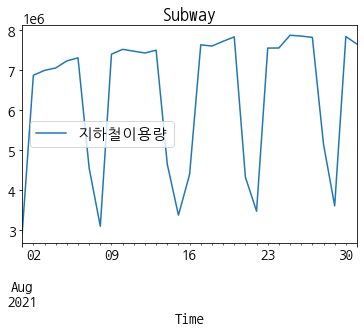

In [224]:
df4['2021-08'].plot(title = 'Subway') # 2021년도 8월 지하철 이용자 그래프 출력

<AxesSubplot:title={'center':'Subway'}, xlabel='Time'>

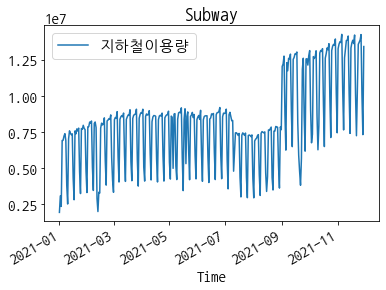

In [225]:
df4['2021-01':'2021-12'].plot(title = 'Subway') # 2021년도 지하철 이용자 그래프 출력

<AxesSubplot:title={'center':'Tallgate'}, xlabel='Time'>

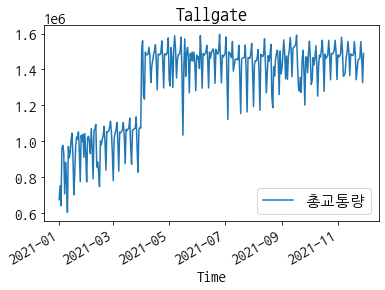

In [226]:
df2['2021-01':'2021-12'].plot(title = 'Tallgate') # 2021년도 톨게이트 이용자 그래프 출력

<AxesSubplot:title={'center':'Corona'}, xlabel='Time'>

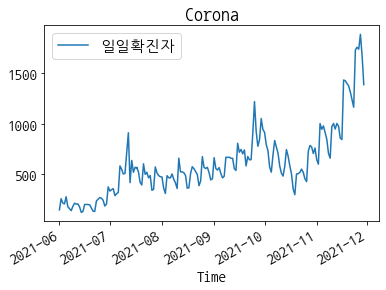

In [227]:
df3['2021-06':'2021-12'].plot(title = 'Corona') # 2021년도 하반기 코로나 확진자 그래프 출력

<AxesSubplot:title={'center':'Corona'}, xlabel='Time'>

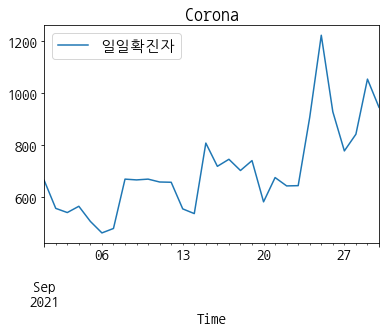

In [228]:
df3['2021-09'].plot(title = 'Corona') # 2021년도 9월 코로나 확진자 그래프 출력

<AxesSubplot:title={'center':'Vaccine'}, xlabel='Time'>

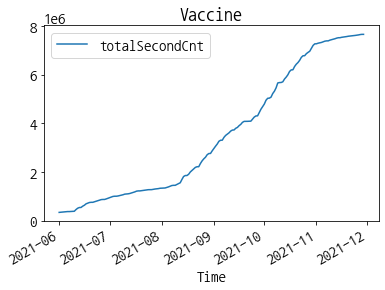

In [229]:
df6['2021-06':'2021-12'].plot(title = 'Vaccine') # 2021년도 하반기 백신 접종율 그래프 출력

In [263]:
train_features = all_corona2[['totalSecondCnt', '지하철이용량']]
train_targets = all_corona2['일일확진자']
# 트레이닝을 위한 타겟과 그 외의 변수들을 구분한 columns

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_targets, test_size=0.2, random_state=1)

In [265]:
model = LinearRegression() # 다중선형회귀 모델을 사용한다
model.fit(X_train,y_train) # 모델 훈련

LinearRegression()

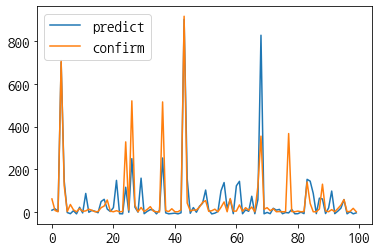

In [266]:
plt.plot(model.predict(X_test[:100]), label="predict")
plt.plot(y_test[:100].values.reshape(-1, 1), label="confirm")
plt.legend()
# 예측값과 실제 확진자 숫자의 비교 그래프

In [262]:
print(model.score(X_train, y_train))
# 모델의 정확도

0.411531179594682


In [257]:
predict = [[7925505, 13430411],[7929739, 13342735],[7933770, 13878441],[7933770,9402782],[7933770, 6724913]] # 12월 1일 ~ 5일의 서울 백신접종자와 지하철 이용자수
model.predict(predict)
y = [[2222,2267,2099,2273,2031]] # 실제 확진자수
y = pd.DataFrame(y)

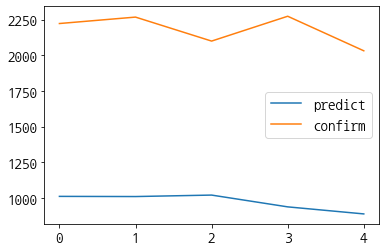

In [258]:
plt.plot(model.predict(predict), label="predict")
plt.plot(y.values.reshape(-1, 1), label="confirm")
plt.legend()